In [1]:
pip install scSpectra

Note: you may need to restart the kernel to use updated packages.


In [2]:
# packages
import scanpy as sc
import scanpy.external as sce
import anndata as anndata
#import diffxpy.api as de
from anndata import AnnData
import time
import os
import numpy as np
import seaborn as sns
import pandas as pd
import re
import h5py
import scipy
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as patches
import matplotlib.colors as colors
import matplotlib.font_manager
import glob
from collections import OrderedDict
from scipy.sparse import csr_matrix
from scanpy.external.pp import magic
from scipy.stats import zscore
import scipy.cluster.hierarchy as hc
from statistics import median
import math
from typing import Union

import numpy.matlib

import numpy as np
import json
import scanpy as sc
from collections import OrderedDict
import scipy
import pandas as pd
import matplotlib.pyplot as plt

#spectra imports
import Spectra as spc
from Spectra import Spectra_util as spc_tl
from Spectra import K_est as kst
from Spectra import default_gene_sets
import os

In [3]:
os.getcwd()

'/Users/jyotirmoyroy/Desktop/T1S_ImmunometabolismPaper/SingleCellRNASeq'

In [4]:
# load the default gene set dictionary from the Spectra paper:
annotations = spc.default_gene_sets.load()

In [5]:
pip install cytopus

Note: you may need to restart the kernel to use updated packages.


In [6]:
#pygraphviz is required for plotting
#!apt install libgraphviz-dev


In [7]:
import pygraphviz as pgv
print(pgv.__version__)

2.0beta0.dev0


In [8]:
#pyvis is required for plotting interactive graphs
!pip install pyvis

In [9]:
import cytopus as cp
import IPython

In [10]:
G = cp.KnowledgeBase()

KnowledgeBase object containing 92 cell types and 201 cellular processes



In [11]:
pip install mygene

Note: you may need to restart the kernel to use updated packages.


all celltypes in knowledge base: ['CD8-T_terminal-exhaustion', 'endo-arterial', 'ILC1', 'TCM', 'baso', 'T-naive', 'ILC', 'gran', 'cDC3', 'cDC', 'endo-lymphatic', 'ILC3-NCRpos', 'lung-endo-venous', 'Lti', 'CD8-TSCM', 'CD56dim-NK', 'neutro', 'lung-smooth-muscle', 'endo-systemic-venous', 'crc-carcinoma-cell', 'p-DC', 'B-memory-switched', 'all-cells', 'colon-epi', 'ILC3', 'CD4-TSCM', 'B-memory-non-switched', 'iNKT', 'capillary', 'CD4-TEM', 'GC-B', 'Mac', 'CD8-TCM', 'cDC1', 'B-naive', 'B-pb-mature', 'CD8-Teffector', 'CD8-T-progenitor-exhausted', 'TSCM', 'fibro', 'endo', 'T', 'DC', 'NSCLC-carcinoma-cell', 'B-pb-t2', 'B-memory', 'MAIT', 'plasma-blast', 'mono', 'Treg', 'MDC', 'CD8-TEM', 'M', 'eosino', 'NK-adaptive', 'B-memory-IgM-MZ', 'TFH', 'carcinoma-cell', 'CD8-T_KLRG1pos-effector', 'abT', 'c-mono', 'CD4-T', 'leukocyte', 'gdT', 'B', 'TEM', 'ILC3-NCRneg', 'TRM', 'CD4-TRM', 'CD8-TRM', 'B-memory-DN', 'endo-aerocyte', 'B-pb-t3', 'TNK', 'cDC2', 'mast', 'mo-DC', 'CD8-T', 'nc-mono', 'lung-epi', 'L

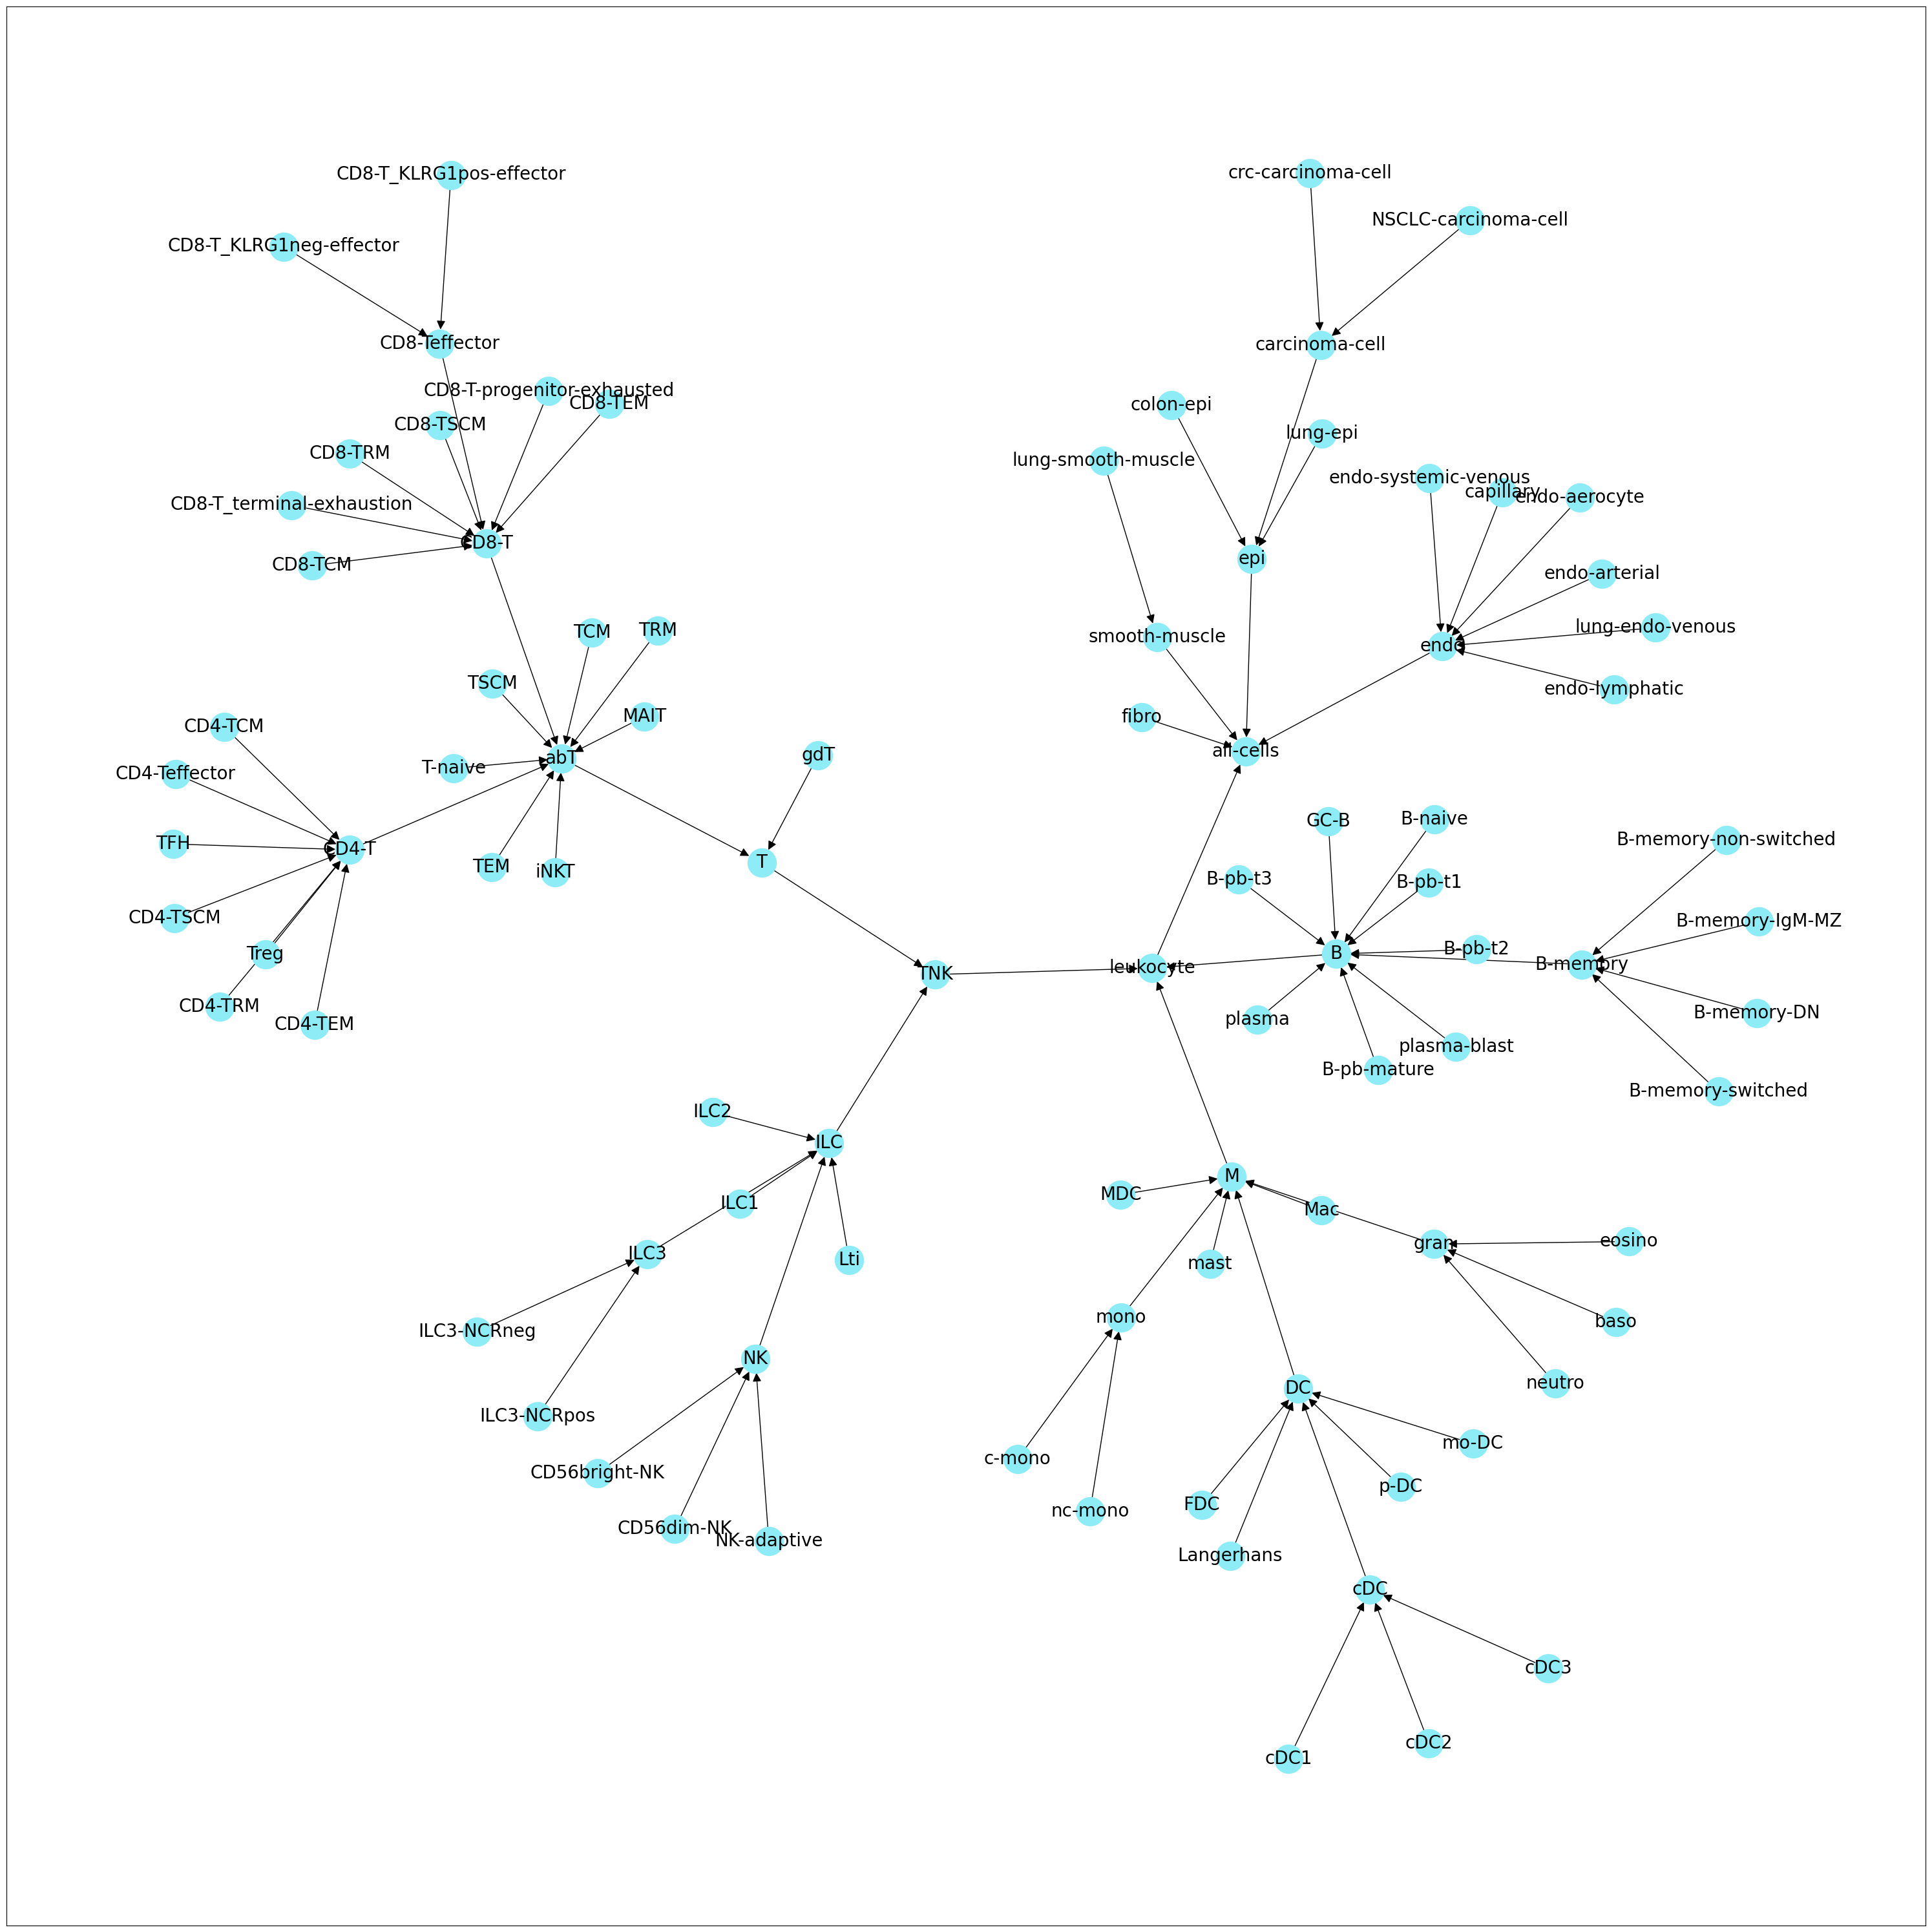

In [12]:
#plot the cell type hierarchy
G.plot_celltypes()

In [13]:
import mygene
import pandas as pd
import contextlib
import io

# Initialize mygene
mg = mygene.MyGeneInfo()

def convert_genes_to_mouse(human_genes):
    # Convert all gene symbols to uppercase for consistency
    human_genes = [gene.upper() for gene in human_genes]

    # Suppress mygene output during the query
    with contextlib.redirect_stdout(io.StringIO()), contextlib.redirect_stderr(io.StringIO()):
        # Query MyGene.info for mouse orthologs
        query = mg.querymany(
            human_genes, 
            scopes="symbol", 
            fields="symbol,entrezgene,ensembl.gene", 
            species="mouse", 
            as_dataframe=True
        )
    missing_genes = []
    # Extract mapped mouse genes
    mapped_genes = []
    for _, row in query.iterrows():
        if pd.notna(row['symbol']) and pd.notna(row['entrezgene']):  # If the gene was found
            mapped_genes.append(row['symbol'])
        else:  # If the gene was not found
            missing_gene = row.name  # The index contains the original query term
            missing_genes.append(missing_gene)


    # Manual mappings for genes that were not found
    manual_mappings = {
        'ZADH2': 'Zadh2',
        'ADH1A': 'Adh1',
        'PNPLA4': 'Pnpla4',
        'ADH1B': 'Adh1',
        'ADH1C': 'Adh1',
        'IFNA21': 'Ifna',
        'IFNA8': 'Ifna',
        'CASP10': 'Casp10',
        'IFNA17': 'Ifna',
        'DDX58': 'Ddx58',
        'IFNW1': 'Ifnw1',
        'MYL5': 'Myl5',
        'MT1X': 'Mt1',
        'TP53I3': 'Trp53i3',
        'MT2A': 'Mt2',
        'C3ORF52': 'C3orf52',
        'TP63': 'Trp63',
        'TP53': 'Trp53',
        'H2AW': 'H2aw',
        'H1-2': 'H1f2',
        'ZNF365': 'Zfp365',
        'RAB7A': 'Rab7',
        'MAP1LC3C': 'Map1lc3c',
        'ARNTL': 'Arntl',
        'KIF4A': 'Kif4a',
        'SGO2': 'Sgo2',
        'IRGM': 'Irgm',
        'SUPT5H': 'Supt5h',
        'LACRT': 'Lacrt',
        'SLCO1A2': 'Slco1a2',
        'SULT1A2': 'Sult1a2',
        'MMP1': 'Mmp1',
        'CCL16': 'Ccl16',
        'CXCL6': 'Cxcl6',
        'TNFRSF10C': 'Tnfrsf10c',
        'KITLG': 'Kitlg',
        'BCL2A1': 'Bcl2a1',
        'ICOSLG': 'Icoslg',
        'FTL': 'Ftl',
        'TF': 'Tf',
        'MAN1A1': 'Man1a1',
        'ALG10': 'Alg10',
        'CD59': 'Cd59',
        'ENOSF1': 'Enosf1',
        'SCD': 'Scd',
        'LILRB5': 'Lilrb5',
        'CCL18': 'Ccl18',
        'C1S': 'C1s',
        'C1R': 'C1r',
        'C5': 'C5',
        'CKMT1B': 'Ckmt1b',
        'H2BC19P': 'H2bc19',
        'H1-4': 'H1f4',
        'H2BC17': 'H2bc17',
        'H2BC10': 'H2bc10',
        'H3-2': 'H3f2',
        'H4C13': 'H4c13',
        'H2AC16': 'H2ac16',
        'H2BP2': 'H2bp2',
        'H2BP1': 'H2bp1',
        'H2AZP3': 'H2azp3',
        'H2BU1': 'H2bu1',
        'C1ORF68': 'C1orf68',
        'HBD': 'Hbd',
        'C10ORF90': 'C10orf90',
        'OR10H3': 'Olfr123',
        'SIGLEC5': 'Siglec5',
        'ZNF90': 'Zfp90',
        'ZNF493': 'Zfp493',
        'STH': 'Sth',
        'ZNF557': 'Zfp557',
        'REG1A': 'Reg1a',
        'IL4R': 'Il4r',
        'CA12': 'Ca12',
        'GPI': 'Gpi',
        'MT1E': 'Mt1',
        'ZNF292': 'Zfp292',
        'GABARAPL3': 'Gabarapl3',
        'GBA': 'Gba',
        'MAP1LC3B2': 'Map1lc3b2',
        'TMSB4XP8': 'Tmsb4x',
        'FGF19': 'Fgf19',
        'TMSB4Y': 'Tmsb4y',
        'INS': 'Ins',
        'IFI6': 'Ifi6',
        'OASL': 'Oasl',
        'ZNF697': 'Zfp697',
        'ZBED2': 'Zbed2',
        'SIAH1': 'Siah1',
        'KIAA1549L': 'Kiaa1549l',
        'SI': 'Si',
        'IL26': 'Il26',
        'GBA': 'Gba',
        'CD8B': 'Cd8b',
        'ATP6V0E1': 'Atp6v0e1',
        'CHMP4A': 'Chmp4a',
        'CD244': 'Cd244',
        'TTC37': 'Ttc37',
        'GLUD2': 'Glud2',
        'STX4': 'Stx4',
        'CHST6': 'Chst6',
        'CYP2C18': 'Cyp2c18',
        'PRB3': 'Prb3',
        'LYZ': 'Lyz',
        'SERPINB3': 'Serpinb3',
        'S100P': 'S100p',
        'CA2': 'Ca2',
        'CST1': 'Cst1',
        'CSTA': 'Csta',
        'SH2D1B': 'Sh2d1b',
        'YAE1': 'Yae1',
        'LDHAL6A': 'Ldhal6a',
        'NLRP9': 'Nlrp9b',
        'GSDMB': 'Gsdmb',
        'G6PD': 'G6pd',
        'PRAMEF6': 'Pramef6',
        'RNF175': 'Rnf175',
        'RNF103-CHMP3': 'Chmp3',
        'CAMLG': 'Camlg',
        'GPI': 'Gpi',
        'ABCF2-H2BE1': 'H2be1',
        'SLC9A3R1': 'Slc9a3r1',
        'CYP51A1': 'Cyp51a1',
        'DEFB123': 'Defb123',
        'C17ORF78': 'C17orf78',
        'PTTG3P': 'Pttg3p',
        'TAF1L': 'Taf1l',
        'DDX53': 'Ddx53',
        'APOBEC3B': 'Apobec3b',
        'TEPP': 'Tepp',
        'ALPP': 'Alpp',
        'CLC': 'Clc',
        'GK3P': 'Gk3p',
        'LGALS13': 'Lgals13',
        'ALPG': 'Alpg',
        'IL6R': 'Il6r',
        'IL11RA': 'Il11ra',
        'CSH1': 'Csh1',
        'CSH2': 'Csh2',
        'GH2': 'Gh2',
        'GH1': 'Gh1',
        'ZNRD1': 'Znrd1',
        'NT5C3A': 'Nt5c3a',
        'ZNF707': 'Zfp707',
        'SUPT4H1': 'Supt4h1',
        'BOLA2B': 'Bola2b',
        'TP53INP1': 'Trp53inp1',
        'STX5': 'Stx5',
        'UGT2B17': 'Ugt2b17',
        'ABCB1': 'Abcb1',
        'ACAA1': 'Acaa1',
        'PHB': 'Phb',
        'TP53INP2': 'Trp53inp2',
        'TRIM34': 'Trim34',
        'TRIM22': 'Trim22',
        'ST6GALNAC2': 'St6galnac2',
        'SERTAD4-AS1': 'Sertad4-as1',
        'TMEM178A': 'Tmem178a',
        'CAPN14': 'Capn14',
        'HSPB11': 'Hspb11',
        'CA6': 'Ca6',
        'CD1D': 'Cd1d',
        'CA4': 'Ca4',
        'CCDC58': 'Ccdc58',
        'CYP4A22': 'Cyp4a22',
        'SERPINA1': 'Serpina1',
        'GZMH': 'Gzmh',
        'FGFBP2': 'Fgfbp2',
        'GNLY': 'Gnly',
        'CHIA': 'Chia',
        'CENPJ': 'Cenpj',
        'C4ORF33': 'C4orf33',
        'TSTA3': 'Tsta3',
        'RNASE2': 'Rnase2',
        'GSTT2B': 'Gstt2b',
        'LGALS9B': 'Lgals9b',
        'FLT3LG': 'Flt3lg',
        'SERPINB6': 'Serpinb6',
        'EFCAB1': 'Efcab1',
        'ZNF124': 'Zfp124',
        'BVES': 'Bves',
        'C12ORF49': 'C12orf49',
        'ZNF623': 'Zfp623',
        'KIAA0513': 'Kiaa0513',
        'ZNF770': 'Zfp770',
        'OXCT2': 'Oxct2',
        'CTSV': 'Ctsv',
        'AKR7A2': 'Akr7a2',
        'HLA-C': 'H2-L',
        'HLA-A': 'H2-K',
        'HLA-B': 'H2-D',
        'ANKH': 'Ankh',
        'H1-0': 'H1f0',
        'BCL2L2-PABPN1': 'Pabpn1',
        'PEA15': 'Pea15',
        'PXDNL': 'Pxdnl',
        'CES2': 'Ces2',
        'ZNF641': 'Zfp641',
        'CD1C': 'Cd1c',
        'ZNF398': 'Zfp398',
        'VNN2': 'Vnn2',
        'CYP2C8': 'Cyp2c8',
        'CYP2A13': 'Cyp2a13',
        'CYP2C9': 'Cyp2c29',
        'CYP2B6': 'Cyp2b6',
        'ALOX15B': 'Alox8',
        'ZNF516': 'Zfp516',
        'STATH': 'Stath',
        'TXN': 'Txn',
        'S100A12': 'S100a12',
        'S100A7': 'S100a7',
        'DEFB4B': 'Defb4b',
        'GALNT8': 'Galnt8',
        'ARMC4': 'Armc4',
        'MIR1915HG': 'Mir1915hg',
        'ZNF467': 'Zfp467',
        'KLK3': 'Klk3',
        'C19ORF38': 'C19orf38',
        'C1ORF229': 'C1orf229',
        'CES1': 'Ces1',
        'ZNF579': 'Zfp579',
        'NKX2-8': 'Nkx2-8',
        'CXCL6': 'Cxcl6',
        'MT1M': 'Mt1',
        'MT1G': 'Mt1',
        'GBP1': 'Gbp1',
        'IL32': 'Il32',
        'OAS1': 'Oas1',
        'FCGR3A': 'Fcgr3a',
        'BTN3A2': 'Btn3a2',
        'REN': 'Ren',
        'SCD5': 'Scd5',
        'NCR3': 'Ncr3',
        'C3ORF18': 'C3orf18',
        'CYP4A11': 'Cyp4a12a',
        'CYP3A4': 'Cyp3a11',
        'CYP2A6': 'Cyp2a5',
        'AKR1C4': 'Akr1c18',
        'CYP4F2': 'Cyp4f14',
        'CA13': 'Car13',
        'NLRP1': 'Nlrp1a',
        'PYDC1': 'Pydc3',
        'NAIP': 'Naip1',
        'ADH6': 'Adh6b',
        'CD58': 'Cd58',  # CD58 is conserved in mice
    'FCER2': 'Fcer2a',  # Mouse ortholog of human FCER2
    'CD24': 'Cd24a',  # Mouse ortholog of human CD24
    'TM4SF18': 'Tm4sf18',  # Mouse ortholog of human TM4SF18
    'CCL21': 'Ccl21',  # Mouse ortholog of human CCL21
    'TNFRSF10A': 'Tnfrsf10a',  # Mouse ortholog of human TNFRSF10A
    'LILRB1': 'Pirb',  # Mouse ortholog of human LILRB1
    'CR1': 'Crry',  # Mouse ortholog of human CR1 (complement receptor 1)
    'ZNF385D': 'Zfp385d',  # Mouse ortholog of human ZNF385D
    'CYP3A5': 'Cyp3a11',  # Mouse ortholog of human CYP3A5
    'KIAA1217': 'Kiaa1217',  # Mouse ortholog of human KIAA1217
    'KLRF1': 'Klrf1',  # Mouse ortholog of human KLRF1
    'CLEC4C': 'Clec4c',  # Mouse ortholog of human CLEC4C
    'LILRB4': 'Pirb',  # Mouse ortholog of human LILRB4
    'LILRA4': 'Pira',  # Mouse ortholog of human LILRA4
    'IGHA1': 'Igha',  # Mouse ortholog of human IGHA1
    'IGHA2': 'Igha',  # Mouse ortholog of human IGHA2
    'IGHG1': 'Ighg1',  # Mouse ortholog of human IGHG1
    'IGHG2': 'Ighg2',  # Mouse ortholog of human IGHG2
    'IGHG4': 'Ighg4',  # Mouse ortholog of human IGHG4
    'CEACAM8': 'Ceacam8',  # Mouse ortholog of human CEACAM8
    'FCGR3B': 'Fcgr3',  # Mouse ortholog of human FCGR3B
    'AZU1': 'Azurocidin',  # Mouse ortholog of human AZU1
    'LILRA2': 'Pira',  # Mouse ortholog of human LILRA2
    'CLEC4A': 'Clec4a',  # Mouse ortholog of human CLEC4A
    'NCR2': 'Ncr2',  # Mouse ortholog of human NCR2
    'FCGR1B': 'Fcgr1',  # Mouse ortholog of human FCGR1B
    'FCGR2A': 'Fcgr2a',  # Mouse ortholog of human FCGR2A
    'FCGR1A': 'Fcgr1a',  # Mouse ortholog of human FCGR1A
    'CD1A': 'Cd1d1',  # Mouse ortholog of human CD1A
    'CD209': 'Cd209a',  # Mouse ortholog of human CD209
    'TRDC': 'Trdc',  # Mouse ortholog of human TRDC
    'FCN3': 'Fcn3',  # Mouse ortholog of human FCN3
    'TRBC1': 'Trbc1',  # Mouse ortholog of human TRBC1
    'TRAC': 'Trac',  # Mouse ortholog of human TRAC
    }
    # Add manual mappings for missing genes
    unresolved_genes = []
    # Add manual mappings to the mapped_genes list
    for human_gene in missing_genes:
        if human_gene in manual_mappings:
            mapped_genes.append(manual_mappings[human_gene])
        else:
            unresolved_genes.append(human_gene)

    # Report unresolved genes (genes still missing after manual mappings)
    if unresolved_genes:
        print(f"Warning: No match found for {unresolved_genes}")
    # Ensure the final list is unique
    mapped_genes = list(set(mapped_genes))

    return mapped_genes

human_genes = ["TP53", "MYC", "GATA3", "CD8A"]
mouse_genes = convert_genes_to_mouse(human_genes)
print(mouse_genes)

['Gata3', 'Trp53', 'Cd8a', 'Myc']


In [14]:
# Convert genes for cellular processes
for process, genes in G.processes.items():
    G.processes[process] = convert_genes_to_mouse(genes)



In [15]:
# Convert genes for cellular identities
for identity, genes in G.identities.items():
    G.identities[identity] = convert_genes_to_mouse(genes)

In [16]:
G.processes

{'all_chondroitine-and-heparan-sulfate_synthesis': ['Glce',
  'Extl3',
  'Chst13',
  'Csgalnact2',
  'Chsy3',
  'Hs3st3b1',
  'Hs3st6',
  'B3gat3',
  'B3gat1',
  'Chsy1',
  'Hs6st3',
  'B4galt7',
  'Xylt2',
  'Ndst4',
  'Chpf',
  'Ndst2',
  'Extl2',
  'Xylt1',
  'Chst11',
  'Ndst3',
  'Hs3st4',
  'Hs6st2',
  'Hs3st3a1',
  'Chst3',
  'Chst12',
  'B3galt6',
  'Chpf2',
  'Extl1',
  'B3gat2',
  'Chst7',
  'Hs3st1',
  'Ext1',
  'Hs2st1',
  'Hs6st1',
  'Ust',
  'Ndst1',
  'Csgalnact1',
  'Hs3st5',
  'Hs3st2',
  'Ext2'],
 'all_retinol_metabolism': ['Rdh10',
  'Rdh8',
  'Lrat',
  'Rdh12',
  'Pnpla4',
  'Rdh5',
  'Rdh13',
  'Rdh14',
  'Sdr16c5',
  'Ugt1a8',
  'Adh7',
  'Rdh11',
  'Bco1',
  'Zadh2',
  'Adh1',
  'Aox1',
  'Aldh1a3',
  'Aldh1a2',
  'Ugt1a10',
  'Rdh16'],
 'all_RIG-I-like-receptor_signaling': ['Ikbkg',
  'Atg12',
  'Ifna6',
  'Ifnk',
  'Traf6',
  'Ikbke',
  'Il12a',
  'Mapk13',
  'Map3k7',
  'Ifna10',
  'Cxcl10',
  'Tbk1',
  'Atg5',
  'Ifih1',
  'Ifna2',
  'Ifne',
  'Ddx3x',
  'Ifn

all celltypes in knowledge base: ['CD8-T_terminal-exhaustion', 'endo-arterial', 'ILC1', 'TCM', 'baso', 'T-naive', 'ILC', 'gran', 'cDC3', 'cDC', 'endo-lymphatic', 'ILC3-NCRpos', 'lung-endo-venous', 'Lti', 'CD8-TSCM', 'CD56dim-NK', 'neutro', 'lung-smooth-muscle', 'endo-systemic-venous', 'crc-carcinoma-cell', 'p-DC', 'B-memory-switched', 'all-cells', 'colon-epi', 'ILC3', 'CD4-TSCM', 'B-memory-non-switched', 'iNKT', 'capillary', 'CD4-TEM', 'GC-B', 'Mac', 'CD8-TCM', 'cDC1', 'B-naive', 'B-pb-mature', 'CD8-Teffector', 'CD8-T-progenitor-exhausted', 'TSCM', 'fibro', 'endo', 'T', 'DC', 'NSCLC-carcinoma-cell', 'B-pb-t2', 'B-memory', 'MAIT', 'plasma-blast', 'mono', 'Treg', 'MDC', 'CD8-TEM', 'M', 'eosino', 'NK-adaptive', 'B-memory-IgM-MZ', 'TFH', 'carcinoma-cell', 'CD8-T_KLRG1pos-effector', 'abT', 'c-mono', 'CD4-T', 'leukocyte', 'gdT', 'B', 'TEM', 'ILC3-NCRneg', 'TRM', 'CD4-TRM', 'CD8-TRM', 'B-memory-DN', 'endo-aerocyte', 'B-pb-t3', 'TNK', 'cDC2', 'mast', 'mo-DC', 'CD8-T', 'nc-mono', 'lung-epi', 'L

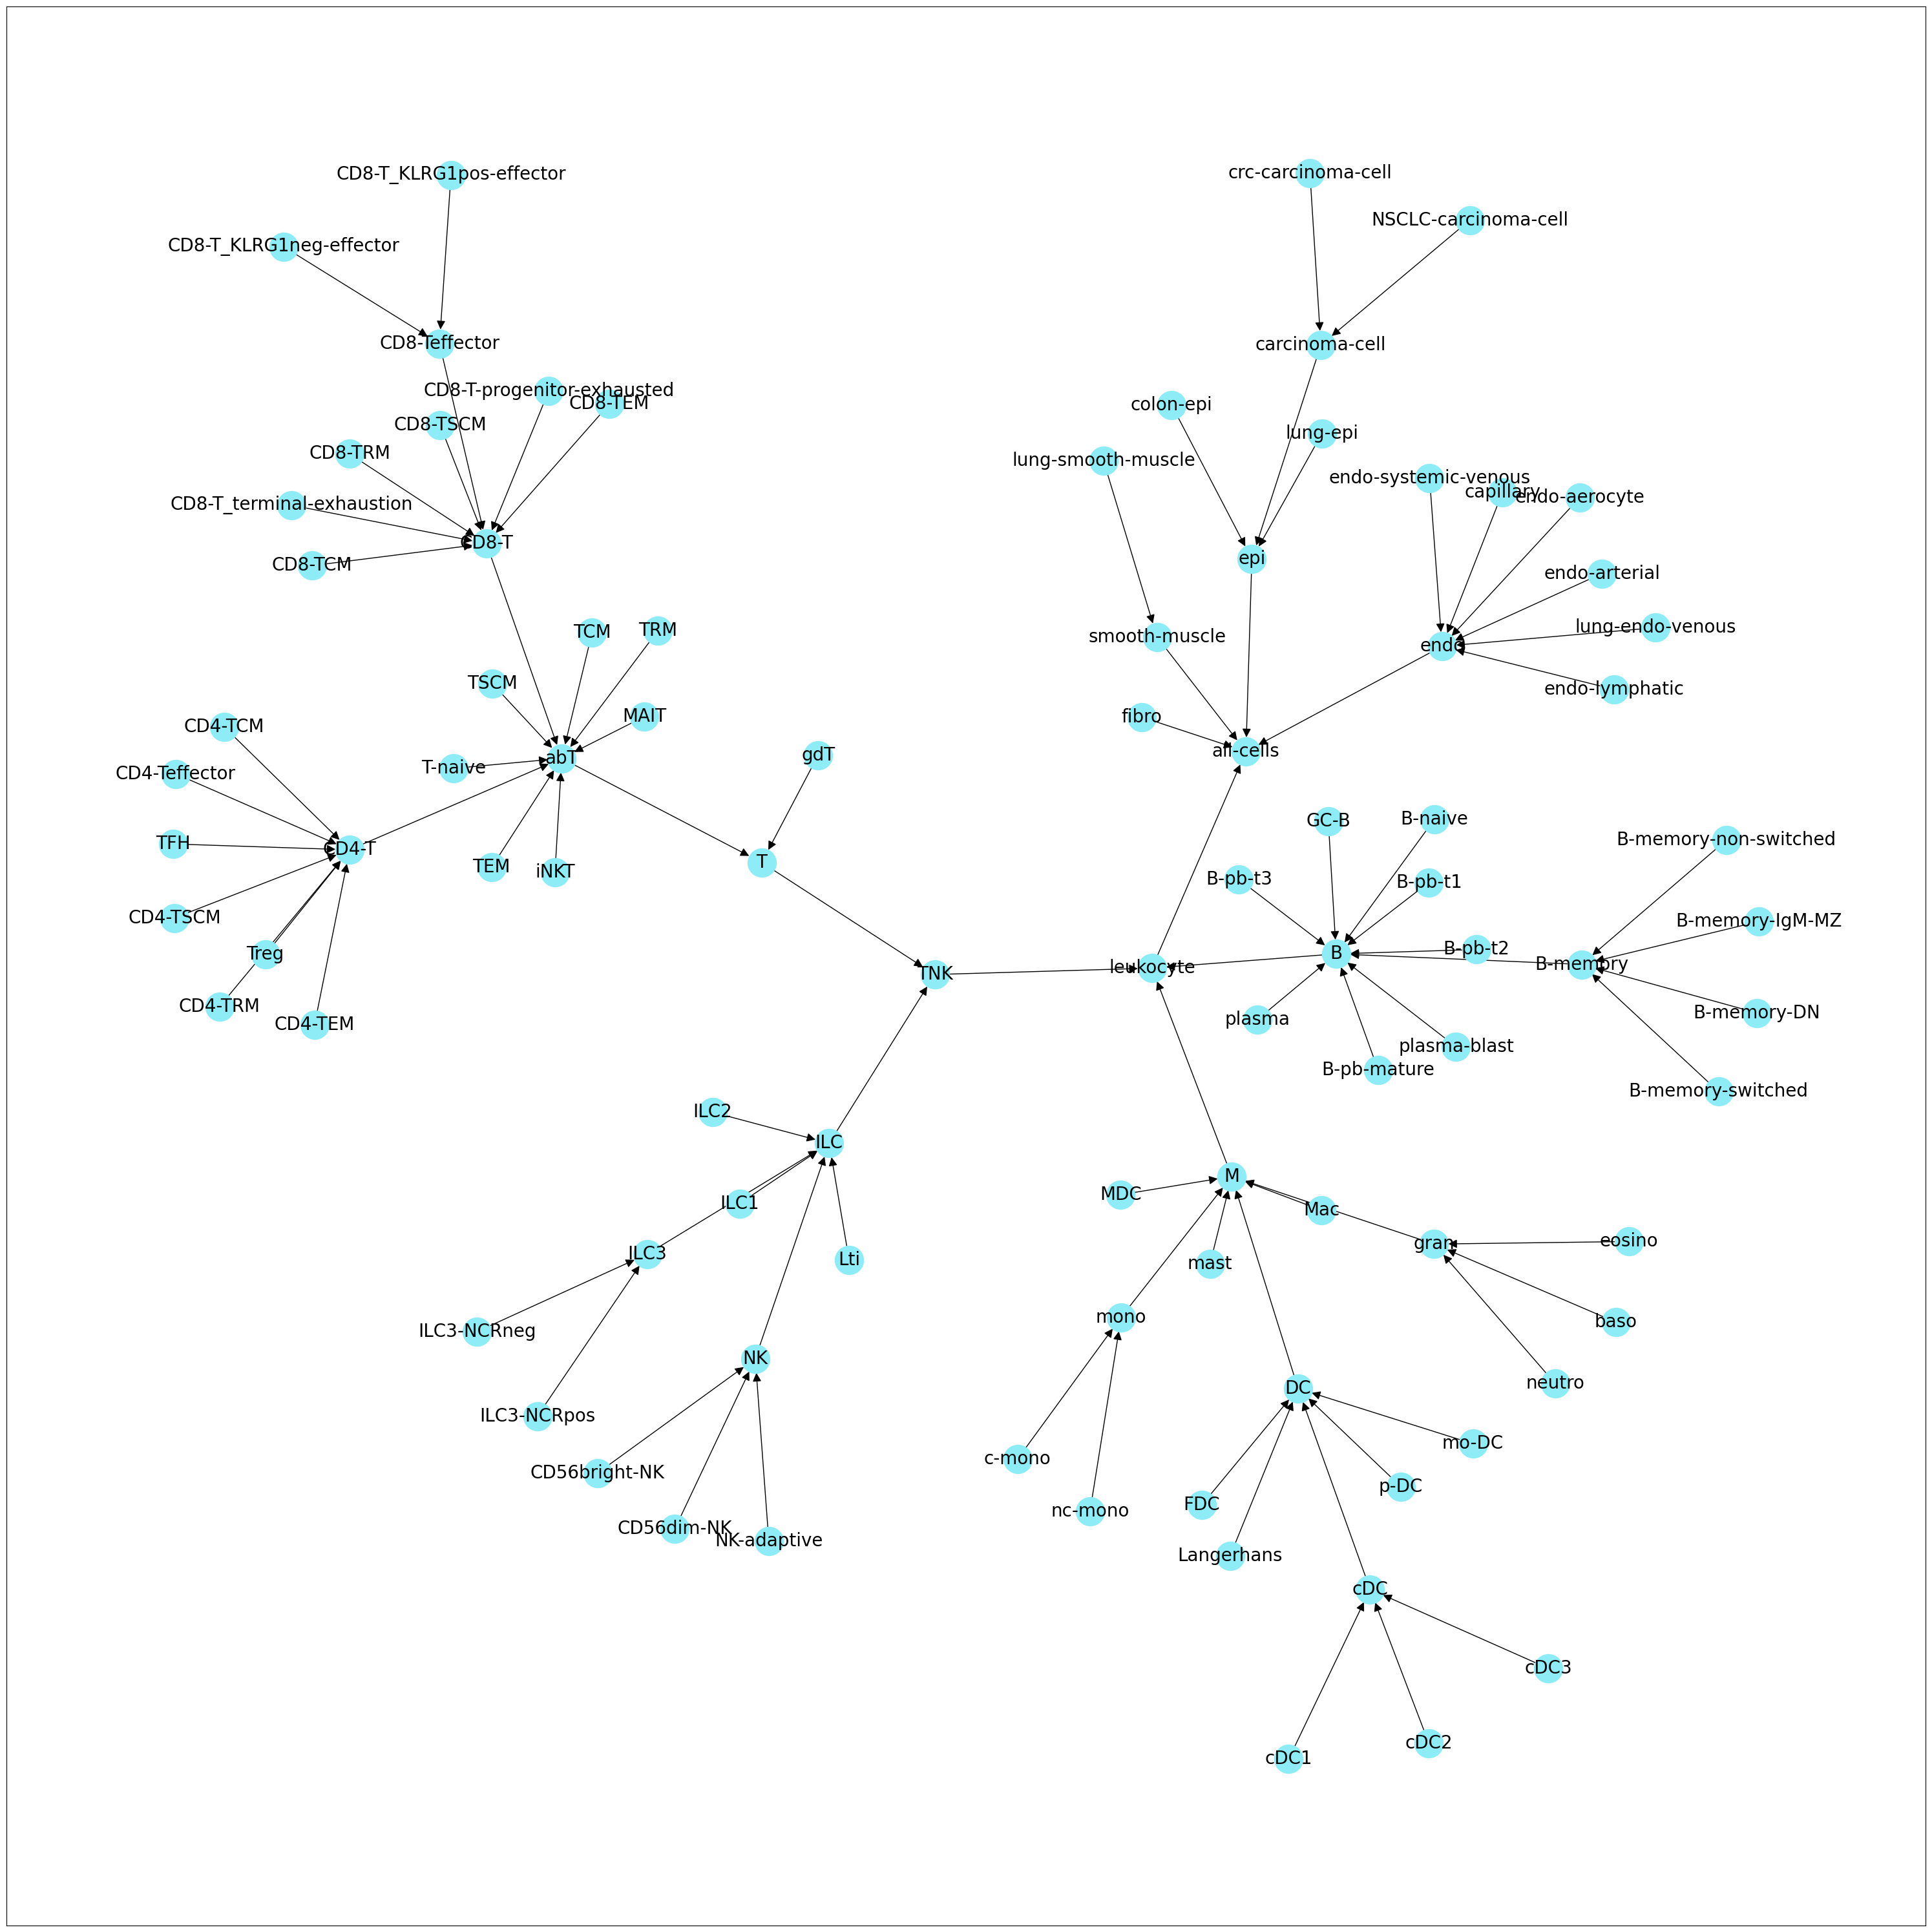

In [17]:
#plot the cell type hierarchy
G.plot_celltypes()

In [18]:
# List all identity names
identity_names = list(G.identities.keys())
print(f"Identities: {identity_names}")

Identities: ['TCM', 'Treg', 'T-naive', 'B-pb-t2', 'endo-lymphatic', 'TSCM', 'cDC1', 'ILC1', 'NK-adaptive', 'TEM', 'FDC', 'endo-systemic-venous', 'endo-aerocyte', 'CD56bright-NK', 'plasma-blast', 'CD8-T_KLRG1pos-effector', 'p-DC', 'mast', 'B-memory-DN', 'B-naive', 'CD4-T', 'B-pb-t3', 'B', 'B-pb-mature', 'Mac', 'gran', 'cDC2', 'CD56dim-NK', 'TRM', 'Lti', 'ILC3-NCRpos', 'abT', 'TFH', 'mono', 'CD8-T_KLRG1neg-effector', 'B-memory-IgM-MZ', 'cDC3', 'B-memory-switched', 'ILC3-NCRneg', 'Langerhans', 'mo-DC', 'endo-arterial', 'ILC2', 'plasma', 'B-pb-t1', 'lung-endo-venous', 'gdT', 'NK', 'capillary', 'CD8-T', 'B-memory', 'B-memory-non-switched', 'GC-B']


In [24]:
G.identities

{'TCM': ['Itgal',
  'Cd58',
  'S1pr1',
  'Cd44',
  'Il7r',
  'S1pr4',
  'Fas',
  'Cxcr3',
  'Il2rb',
  'Cd27',
  'Ccr7',
  'Sell',
  'Cd28'],
 'Treg': ['Il2ra',
  'Tnfrsf9',
  'Tnfrsf18',
  'Foxp3',
  'Ctla4',
  'Nt5e',
  'Entpd1',
  'Tgfb1'],
 'T-naive': ['Il7r', 'S1pr4', 'S1pr1', 'Cd27', 'Ccr7', 'Sell', 'Cd28'],
 'B-pb-t2': ['Cr2',
  'Jchain',
  'Il10',
  'Ighm',
  'Ighd',
  'Cd38',
  'Cd24a',
  'Mme',
  'Prss3',
  'Fcer2a'],
 'endo-lymphatic': ['Mmrn1',
  'Sncg',
  'Pdpn',
  'Prox1',
  'Tbx1',
  'Flt4',
  'Scn3b',
  'Pkhd1l1',
  'Reln',
  'Lyve1',
  'Ccl21',
  'Tff3',
  'Sema3d',
  'Klhl4',
  'Tm4sf18'],
 'TSCM': ['Il7r', 'Fas', 'Atxn1', 'Il2rb', 'Cd27', 'Ccr7', 'Sell', 'Cd28'],
 'cDC1': ['Irf8',
  'Clec9a',
  'Xcr1',
  'Id2',
  'Thbd',
  'Cadm1',
  'Cd8a',
  'Batf3',
  'Cxcl10',
  'Cxcl9',
  'Btla',
  'Cd226',
  'Dpp4',
  'Cd33'],
 'ILC1': ['Il12rb1', 'Klrb1', 'Tnfrsf10a', 'Il1r2', 'Il1r1', 'Cxcr3', 'Ncr3'],
 'NK-adaptive': ['Ifng', 'Pirb', 'B3gat1', 'Fcgr3a', 'Ncam1', 'Cd2', 'Klrc

In [19]:
celltype_of_interest = ['CD8-T']  
global_celltypes = ['all-cells','leukocyte','CD8-T']

In [20]:
G.get_celltype_processes(celltype_of_interest,global_celltypes = global_celltypes,get_children=True,get_parents =True,
                        child_depth=1,parent_depth=1)

In [21]:
conversion_dict = {
 'CD8-T':'CD8-T'}

#to map KnowledgeBase labels back to labels in data
conversion_dict_inv = {}
for i,v in conversion_dict.items():
    conversion_dict_inv[v]=i
conversion_dict_inv['global'] = 'global'

In [25]:
# Convert genes for cell type processes
for celltype, processes_dict in G.celltype_process_dict.items():
    for process, genes in processes_dict.items():
        G.celltype_process_dict[celltype][process] = convert_genes_to_mouse(genes)

In [27]:
G.celltype_process_dict.items()

dict_items([('CD8-T', {'T_IL4_response': ['Ccl17', 'Ccl18', 'Il17rb', 'Spint2', 'Gata3', 'Gpr183', 'Lima1', 'Fn1', 'Krt1'], 'T_tcr-activation': ['Csf2', 'Bcat1', 'Il10', 'Alcam', 'Ccl3', 'Sult2b1', 'Cish', 'Fosl1', 'Utf1', 'Crabp2', 'Ccr8', 'Havcr2', 'Mfsd2a', 'Tnfsf8', 'Jag1', 'Tnfsf14', 'Nfatc2', 'Rgs16', 'Il17f', 'Lck', 'Tnfrsf9', 'Egr1', 'Il15ra', 'Fosb', 'Nr4a3', 'Zbtb32', 'Furin', 'Nfatc1', 'Syp', 'Tgfb1', 'Il21', 'Pim3', 'Ifng', 'Il24', 'Sema7a', 'Tnfrsf21', 'Cd40lg', 'Mir193a', 'Il2', 'Gadd45g', 'Gfi1', 'Tnfrsf4', 'Cd160', 'Ier3', 'Stat5a', 'Il4', 'Tnfsf11', 'Il17a', 'Atf3', 'Slc16a1', 'Cd8b', 'Fosl2', 'Alpl', 'Nkg7', 'Slc7a1', 'Xcl1', 'Il5', 'Maff', 'Ccl4', 'Ptger2', 'Rela', 'Il3', 'Nek6', 'Ccl1', 'Lta', 'Il13'], 'T_IL21_response': ['Cxcl2', 'Necap2', 'Tnfaip2', 'Car13', 'Pmepa1', 'Tnip1', 'Ifitm3', 'Sting1']}), ('global', {'all_chondroitine-and-heparan-sulfate_synthesis': ['Glce', 'Extl3', 'Chst13', 'Csgalnact2', 'Chsy3', 'Hs3st3b1', 'Hs3st6', 'B3gat3', 'B3gat1', 'Chsy1', 'Hs

In [28]:
#convert celltype labels back to celltypes in data
Spectra_dict_CD8T = {}

for i,v in G.celltype_process_dict.items():
    Spectra_dict_CD8T[conversion_dict_inv[i]] = v

In [29]:
Spectra_dict_CD8T.keys()

dict_keys(['CD8-T', 'global'])

In [30]:
Spectra_dict_CD8T['CD8-T'].keys()

dict_keys(['T_IL4_response', 'T_tcr-activation', 'T_IL21_response'])

In [31]:
Spectra_dict_CD8T['global'].keys()

dict_keys(['all_chondroitine-and-heparan-sulfate_synthesis', 'all_retinol_metabolism', 'all_RIG-I-like-receptor_signaling', 'all_propanoate_metabolism', 'all_p53-signaling', 'all_autophagy-selective', 'all_circadian-rhythm', 'all_VAL-LEU-ILE_metabolism', 'all_taurine-hypotaurine_metabolism', 'all_microautophagy-lysosomal', 'all_transmembrane-transport-ER', 'all_macroautophagy_regulation_positive', 'all_TYR_metabolism', 'all_SASP', 'all_histone-methylation', 'all_TNF-via-NFkB_signaling', 'all_iron-uptake-and-storage', 'all_n-glycan_synthesis', 'all_transmembrane-transport-golgi', 'all_PHE_metabolism', 'all_riboflavin_metabolism', 'all_polyamines_metabolism', 'all_PI3K-AKT-mTOR_signaling', 'all_inositol-phosphate_metabolism', 'all_DNA-demethylation', 'all_wnt-beta-catenin-signaling', 'all_lactate_production', 'all_complement_production', 'all_n-glycan_degradation', 'all_porphyrine-heme_metabolism', 'all_glycogenesis', 'all_heparan-sulfate_degradation', 'all_creatinine_metabolism', 'all_G

In [32]:
#store Spectra dictionary

import json
jpath = 'Spectra_dict_CD8T.json'

with open(jpath, 'w') as f:
    json.dump(Spectra_dict_CD8T,f)
print('saved data to:',jpath)

saved data to: Spectra_dict_CD8T.json


In [33]:
#load Spectra dictionary

import json
jpath = 'Spectra_dict_CD8T.json'
f = open(jpath, 'r')
Spectra_dict_CD8T = json.loads(f.read())

In [44]:
# Load the .h5ad file
T1D_Timepoints = sc.read("/Users/jyotirmoyroy/Desktop/Immunometabolism T1D Paper/Data/Sequencing/SingleCellRNASeq/T1D_Timepoints_scr.h5ad")

In [45]:
T1D_Timepoints

AnnData object with n_obs × n_vars = 56115 × 6225
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'percent.rb', 'RNA_snn_res.0.1', 'seurat_clusters', 'pANN_0.25_0.17_480', 'doublet_finder', 'sample', 'time', 'group', 'pANN_0.25_0.28_1286', 'pANN_0.25_0.27_74', 'pANN_0.25_0.21_789', 'pANN_0.25_0.3_2525', 'pANN_0.25_0.3_3206', 'pANN_0.25_0.3_1840', 'pANN_0.25_0.25_460', 'pANN_0.25_0.3_908', 'pANN_0.25_0.3_2082', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.3', 'SCT_snn_res.0.5', 'SCT_snn_res.0.4', 'CellSubType'
    var: 'features', 'SCT_features', 'n_cells'
    obsm: 'X_umap'
    layers: 'SCT'

In [46]:
# View unique values in the 'CellSubType' column of 'obs'
unique_cell_subtypes = T1D_Timepoints.obs['CellSubType'].unique()
print(unique_cell_subtypes)


['CD8 memory', 'Tcon memory', 'B Cell', 'Macrophage', 'Tcon exhausted effector-like', ..., 'Acinar Cell', 'ILC2', 'ILC3', 'Plasma Cell', 'CD8 exhausted effector-like']
Length: 17
Categories (17, object): ['Acinar Cell', 'B Cell', 'CD8 exhausted effector-like', 'CD8 memory', ..., 'Tcon activated ', 'Tcon exhausted effector-like', 'Tcon memory', 'Tregs']


In [48]:
# Display unique values in the TCellType column
T1D_Timepoints.obs["CellSubType"].unique()

['CD8 memory', 'Tcon memory', 'B Cell', 'Macrophage', 'Tcon exhausted effector-like', ..., 'Acinar Cell', 'ILC2', 'ILC3', 'Plasma Cell', 'CD8 exhausted effector-like']
Length: 17
Categories (17, object): ['Acinar Cell', 'B Cell', 'CD8 exhausted effector-like', 'CD8 memory', ..., 'Tcon activated ', 'Tcon exhausted effector-like', 'Tcon memory', 'Tregs']

In [50]:
# Subset for CD8TCells (keeping only 'CD8 exhausted effector-like' and 'CD8 memory')
# Filter for 'CD8 exhausted effector-like' and 'CD8 memory' in 'CellSubType'
CD8TCells = T1D_Timepoints[T1D_Timepoints.obs['CellSubType'].isin(['CD8 exhausted effector-like', 'CD8 memory'])].copy()

# Check the number of cells in each subset
print("CD8TCells:", CD8TCells.shape)

CD8TCells: (11492, 6225)


In [51]:
list(set(CD8TCells.obs['CellSubType']))

['CD8 memory', 'CD8 exhausted effector-like']

In [53]:
Spectra_dict_CD8T.keys()

dict_keys(['CD8-T', 'global'])

In [54]:
# To view gene names in the AnnData object
gene_names = CD8TCells.var_names  # For AnnData format, this holds the gene names
print(gene_names)


Index(['Lypla1', 'Tcea1', 'Atp6v1h', 'Rb1cc1', 'Vcpip1', 'Sgk3', 'Cops5',
       'Cspp1', 'Arfgef1', 'Lactb2',
       ...
       'mt-Co1', 'mt-Co2', 'mt-Atp8', 'mt-Atp6', 'mt-Co3', 'mt-Nd3', 'mt-Nd4l',
       'mt-Nd5', 'mt-Nd6', 'mt-Cytb'],
      dtype='object', length=6225)


In [55]:
print(Spectra_dict_CD8T)

{'CD8-T': {'T_IL4_response': ['Ccl17', 'Ccl18', 'Il17rb', 'Spint2', 'Gata3', 'Gpr183', 'Lima1', 'Fn1', 'Krt1'], 'T_tcr-activation': ['Csf2', 'Bcat1', 'Il10', 'Alcam', 'Ccl3', 'Sult2b1', 'Cish', 'Fosl1', 'Utf1', 'Crabp2', 'Ccr8', 'Havcr2', 'Mfsd2a', 'Tnfsf8', 'Jag1', 'Tnfsf14', 'Nfatc2', 'Rgs16', 'Il17f', 'Lck', 'Tnfrsf9', 'Egr1', 'Il15ra', 'Fosb', 'Nr4a3', 'Zbtb32', 'Furin', 'Nfatc1', 'Syp', 'Tgfb1', 'Il21', 'Pim3', 'Ifng', 'Il24', 'Sema7a', 'Tnfrsf21', 'Cd40lg', 'Mir193a', 'Il2', 'Gadd45g', 'Gfi1', 'Tnfrsf4', 'Cd160', 'Ier3', 'Stat5a', 'Il4', 'Tnfsf11', 'Il17a', 'Atf3', 'Slc16a1', 'Cd8b', 'Fosl2', 'Alpl', 'Nkg7', 'Slc7a1', 'Xcl1', 'Il5', 'Maff', 'Ccl4', 'Ptger2', 'Rela', 'Il3', 'Nek6', 'Ccl1', 'Lta', 'Il13'], 'T_IL21_response': ['Cxcl2', 'Necap2', 'Tnfaip2', 'Car13', 'Pmepa1', 'Tnip1', 'Ifitm3', 'Sting1']}, 'global': {'all_chondroitine-and-heparan-sulfate_synthesis': ['Glce', 'Extl3', 'Chst13', 'Csgalnact2', 'Chsy3', 'Hs3st3b1', 'Hs3st6', 'B3gat3', 'B3gat1', 'Chsy1', 'Hs6st3', 'B4galt

In [56]:
import pandas as pd

# Add a new column 'celltype' to the .obs metadata
CD8TCells.obs['celltype'] = 'CD8-T'

# Verify the new column
print(CD8TCells.obs.head())


                               orig.ident  nCount_RNA  nFeature_RNA  \
AAACAAGCAACAGGGAAGAGGCAA-1  SeuratProject      1185.0           906   
AAACCAGGTTAACCACAGAGGCAA-1  SeuratProject      4552.0          2454   
AAACCGGTCAACCTCAAGAGGCAA-1  SeuratProject       698.0           570   
AAAGCATGTGCGCATCAGAGGCAA-1  SeuratProject       716.0           588   
AAAGCCTAGAGGATGAAGAGGCAA-1  SeuratProject      2532.0          1614   

                            percent.mt  percent.rb RNA_snn_res.0.1  \
AAACAAGCAACAGGGAAGAGGCAA-1    0.337553         0.0               0   
AAACCAGGTTAACCACAGAGGCAA-1    0.637083         0.0               2   
AAACCGGTCAACCTCAAGAGGCAA-1    0.286533         0.0               0   
AAAGCATGTGCGCATCAGAGGCAA-1    0.279330         0.0               0   
AAAGCCTAGAGGATGAAGAGGCAA-1    1.658768         0.0               0   

                            seurat_clusters  pANN_0.25_0.17_480  \
AAACAAGCAACAGGGAAGAGGCAA-1               14            0.061815   
AAACCAGGTTAACCACAG

In [57]:
Spectra_dict_CD8T = spc_tl.check_gene_set_dictionary(
    CD8TCells,
    Spectra_dict_CD8T,
    obs_key='celltype',
    global_key='global')

Cell type labels in gene set annotation dictionary and AnnData object are identical
removing gene set all_retinol_metabolism for cell type global which is of length 20 2 genes are found in the data. minimum length is 3
removing gene set all_propanoate_metabolism for cell type global which is of length 7 0 genes are found in the data. minimum length is 3
removing gene set all_transmembrane-transport-ER for cell type global which is of length 3 1 genes are found in the data. minimum length is 3
removing gene set all_complement_production for cell type global which is of length 18 2 genes are found in the data. minimum length is 3
removing gene set all_creatinine_metabolism for cell type global which is of length 6 1 genes are found in the data. minimum length is 3
removing gene set all_glycogenolysis for cell type global which is of length 8 2 genes are found in the data. minimum length is 3
removing gene set all_biotin_metabolism for cell type global which is of length 5 2 genes are fou

In [58]:
# Step 1: Identify highly variable genes
sc.pp.highly_variable_genes(CD8TCells, flavor='seurat', n_top_genes=2000)


In [59]:
CD8TCells

AnnData object with n_obs × n_vars = 11492 × 6225
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'percent.rb', 'RNA_snn_res.0.1', 'seurat_clusters', 'pANN_0.25_0.17_480', 'doublet_finder', 'sample', 'time', 'group', 'pANN_0.25_0.28_1286', 'pANN_0.25_0.27_74', 'pANN_0.25_0.21_789', 'pANN_0.25_0.3_2525', 'pANN_0.25_0.3_3206', 'pANN_0.25_0.3_1840', 'pANN_0.25_0.25_460', 'pANN_0.25_0.3_908', 'pANN_0.25_0.3_2082', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.3', 'SCT_snn_res.0.5', 'SCT_snn_res.0.4', 'CellSubType', 'celltype'
    var: 'features', 'SCT_features', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg'
    obsm: 'X_umap'
    layers: 'SCT'

In [60]:
# fit the model (We will run this with only 2 epochs to decrease runtime in this tutorial)

CD8TCells.X = CD8TCells.X.toarray() if scipy.sparse.issparse(CD8TCells.X) else CD8TCells.X

model = spc.est_spectra(adata=CD8TCells,
    gene_set_dictionary=Spectra_dict_CD8T,
    use_highly_variable=True,
    cell_type_key="celltype",
    use_weights=True,
    lam=0.1, # varies depending on data and gene sets, try between 0.5 and 0.001
    delta=0.001,
    kappa=None,
    rho=0.001,
    use_cell_types=True,
    n_top_vals=50,
    label_factors=True,
    overlap_threshold=0.2,
    clean_gs = True,
    min_gs_num = 3,
    num_epochs=10000#here running only 2 epochs for time reasons, we recommend 10,000 epochs for most datasets
)

Cell type labels in gene set annotation dictionary and AnnData object are identical
removing gene set all_retinol_metabolism for cell type global which is of length 20 2 genes are found in the data. minimum length is 3
removing gene set all_propanoate_metabolism for cell type global which is of length 7 0 genes are found in the data. minimum length is 3
removing gene set all_transmembrane-transport-ER for cell type global which is of length 3 1 genes are found in the data. minimum length is 3
removing gene set all_complement_production for cell type global which is of length 18 2 genes are found in the data. minimum length is 3
removing gene set all_creatinine_metabolism for cell type global which is of length 6 1 genes are found in the data. minimum length is 3
removing gene set all_glycogenolysis for cell type global which is of length 8 2 genes are found in the data. minimum length is 3
removing gene set all_biotin_metabolism for cell type global which is of length 5 2 genes are fou

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [30:33<00:00,  5.45it/s]
/Users/jyotirmoyroy/miniconda3/lib/python3.12/site-packages/Spectra/Spectra.py:1340: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Trac' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.iloc[i,j] = id2word[idx_matrix[i,j]]
/Users/jyotirmoyroy/miniconda3/lib/python3.12/site-packages/Spectra/Spectra.py:1340: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Extl3' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.iloc[i,j] = id2word[idx_matrix[i,j]]
/Users/jyotirmoyroy/miniconda3/lib/python3.12/site-packages/Spectra/Spectra.py:1340: FutureWarning: Setting an item of incompatible dtype is deprecated

In [61]:
CD8TCells

AnnData object with n_obs × n_vars = 11492 × 6225
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'percent.rb', 'RNA_snn_res.0.1', 'seurat_clusters', 'pANN_0.25_0.17_480', 'doublet_finder', 'sample', 'time', 'group', 'pANN_0.25_0.28_1286', 'pANN_0.25_0.27_74', 'pANN_0.25_0.21_789', 'pANN_0.25_0.3_2525', 'pANN_0.25_0.3_3206', 'pANN_0.25_0.3_1840', 'pANN_0.25_0.25_460', 'pANN_0.25_0.3_908', 'pANN_0.25_0.3_2082', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.3', 'SCT_snn_res.0.5', 'SCT_snn_res.0.4', 'CellSubType', 'celltype'
    var: 'features', 'SCT_features', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'spectra_vocab'
    uns: 'hvg', 'SPECTRA_factors', 'SPECTRA_markers', 'SPECTRA_L', 'SPECTRA_overlap'
    obsm: 'X_umap', 'SPECTRA_cell_scores'
    layers: 'SCT'

In [106]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

factor_names = CD8TCells.uns['SPECTRA_overlap'].index.tolist()
# Assuming `CD8TCells.obsm['SPECTRA_cell_scores']` contains the cell-factor scores
factor_scores_matrix = CD8TCells.obsm['SPECTRA_cell_scores']  # Cell-factor score matrix (cells x factors)

# Step 2: Create a DataFrame with factor names as columns
factor_scores_df = pd.DataFrame(factor_scores_matrix, columns=factor_names)

# Step 3: Calculate the correlation matrix across factors
factor_correlation = factor_scores_df.corr()

# Set a threshold for correlation
threshold = 0.1  # Only show correlations with absolute value above this threshold
mask = (factor_correlation.abs() < threshold)  # Mask for values below absolute threshold

# Clip values to range -1 to 1 to limit color scale
factor_correlation = factor_correlation.clip(lower=-1, upper=1)

# Identify factors with significant correlations (above absolute threshold) excluding diagonal
significant_correlations = []
for i in range(factor_correlation.shape[0]):
    for j in range(i + 1, factor_correlation.shape[1]):
        if abs(factor_correlation.iloc[i, j]) >= threshold:
            significant_correlations.append((factor_correlation.index[i], factor_correlation.columns[j], factor_correlation.iloc[i, j]))


# Print the significant correlations
correlations_filename = os.path.join("/Users/jyotirmoyroy/Desktop/Immunometabolism T1D Paper/Data/Sequencing/SingleCellRNASeq/Spectra/T1D_Timepoints/TCells/CD8/Significant_correlations_CD8TCells_T1D_Timepoints.csv")
correlations_df = pd.DataFrame(significant_correlations, columns=["Factor 1", "Factor 2", "Correlation"])
correlations_df.to_csv(correlations_filename, index=False)

print(f"Significant correlations saved to: {correlations_filename}")


Significant correlations saved to: /Users/jyotirmoyroy/Desktop/Immunometabolism T1D Paper/Data/Sequencing/SingleCellRNASeq/Spectra/T1D_Timepoints/TCells/CD8/Significant_correlations_CD8TCells_T1D_Timepoints.csv


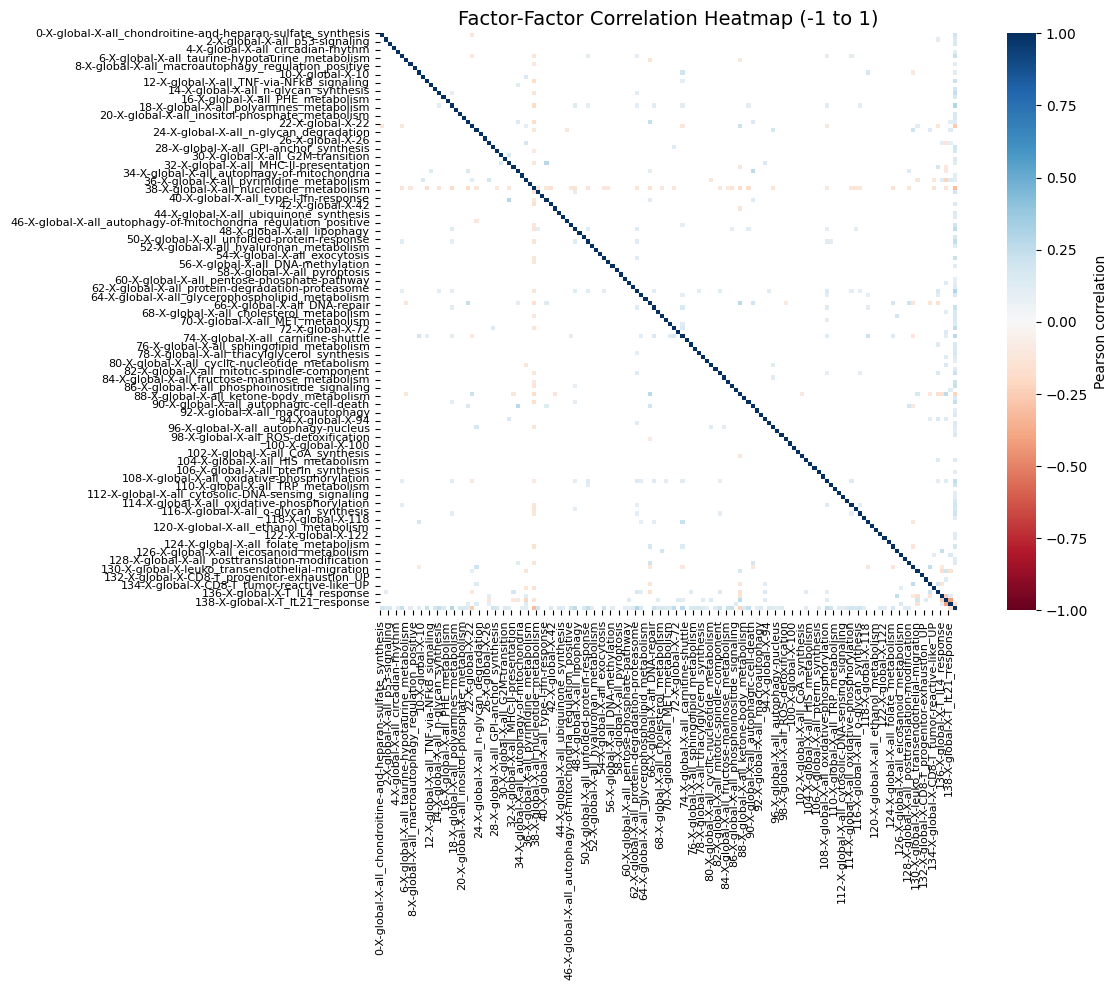

In [105]:
# Adjust figure size
plt.figure(figsize=(12, 10))

# Create heatmap with adjusted label rotation and font size
sns.heatmap(factor_correlation, cmap='RdBu', center=0, vmin=-1, vmax=1, mask=mask, square=True,
            cbar_kws={'label': 'Pearson correlation'}, xticklabels=factor_names, yticklabels=factor_names)

plt.title("Factor-Factor Correlation Heatmap (-1 to 1)", fontsize=14)

# Rotate x and y-axis labels for readability
plt.xticks(rotation=90, fontsize=8)
plt.yticks(rotation=0, fontsize=8)

n = 2  # Show every 5th label
plt.xticks(ticks=range(0, len(factor_names), n), labels=[factor_names[i] for i in range(0, len(factor_names), n)], rotation=90, fontsize=8)
plt.yticks(ticks=range(0, len(factor_names), n), labels=[factor_names[i] for i in range(0, len(factor_names), n)], rotation=0, fontsize=8)

# Save the heatmap
heatmap_filename = os.path.join("/Users/jyotirmoyroy/Desktop/Immunometabolism T1D Paper/Data/Sequencing/SingleCellRNASeq/Spectra/T1D_Timepoints/TCells/CD8/factor_correlation_heatmap_CD8TCells_T1D_Timepoints.png")
plt.savefig(heatmap_filename, format='png', dpi=300, bbox_inches='tight')

plt.show()


In [66]:
factor_correlation

,0-X-global-X-all_chondroitine-and-heparan-sulfate_synthesis,1-X-global-X-all_RIG-I-like-receptor_signaling,2-X-global-X-all_p53-signaling,3-X-global-X-all_autophagy-chaperone-mediated,4-X-global-X-all_circadian-rhythm,5-X-global-X-all_VAL-LEU-ILE_metabolism,6-X-global-X-all_taurine-hypotaurine_metabolism,7-X-global-X-all_microautophagy-lysosomal,8-X-global-X-all_macroautophagy_regulation_positive,9-X-global-X-all_type-II-ifn-response,...,130-X-global-X-leuko_transendothelial-migration,131-X-global-X-CD8-T_terminal-exhaustion,132-X-global-X-CD8-T_progenitor-exhaustion_UP,133-X-global-X-CD8-T_IL12_response,134-X-global-X-CD8-T_tumor-reactive-like_UP,135-X-global-X-135,136-X-global-X-T_IL4_response,137-X-global-X-all_type-II-ifn-response,138-X-global-X-T_IL21_response,139-X-global-X-all_autophagy-chaperone-mediated
0-X-global-X-all_chondroitine-and-heparan-sulfate_synthesis,1.000000,0.056346,0.046321,0.030848,0.045395,0.077147,0.003709,0.021451,0.033577,0.031161,...,0.008833,0.026786,0.049604,-0.011329,-0.006837,0.003741,0.018915,0.067394,-0.007228,0.195324
1-X-global-X-all_RIG-I-like-receptor_signaling,0.056346,1.000000,0.060775,0.043648,0.029642,0.071378,0.018712,0.022526,0.036027,0.037705,...,-0.010149,0.032124,0.033615,0.039011,0.017531,0.105932,0.018804,0.039788,0.046592,0.147013
2-X-global-X-all_p53-signaling,0.046321,0.060775,1.000000,0.026694,0.013618,0.082315,0.005905,0.007315,0.019713,0.022063,...,0.005209,0.020879,0.031214,0.018318,0.049034,0.084897,0.038400,0.009518,0.047493,0.169232
3-X-global-X-all_autophagy-chaperone-mediated,0.030848,0.043648,0.026694,1.000000,0.002406,0.036232,-0.011710,-0.008895,0.010019,0.005859,...,0.005643,-0.014437,0.018723,0.008171,-0.023100,0.054691,-0.003017,0.026407,0.035401,0.055371
4-X-global-X-all_circadian-rhythm,0.045395,0.029642,0.013618,0.002406,1.000000,0.047940,0.021771,0.020991,0.000546,0.042574,...,-0.017552,0.033804,0.020375,0.006966,0.001639,0.016083,0.005043,0.016046,0.019511,0.111100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135-X-global-X-135,0.003741,0.105932,0.084897,0.054691,0.016083,0.041538,0.069880,0.039384,0.018876,-0.033072,...,0.037712,-0.043422,0.052923,0.195394,0.007689,1.000000,-0.080267,0.008132,-0.042036,0.097154
136-X-global-X-T_IL4_response,0.018915,0.018804,0.038400,-0.003017,0.005043,0.031693,-0.013642,-0.015325,0.008581,-0.032576,...,-0.175208,0.086495,0.035791,-0.130089,-0.050630,-0.080267,1.000000,-0.236729,0.107206,-0.044567
137-X-global-X-all_type-II-ifn-response,0.067394,0.039788,0.009518,0.026407,0.016046,0.057859,-0.003861,-0.043835,0.032758,0.078234,...,0.190878,0.030473,0.118782,0.036480,0.008488,0.008132,-0.236729,1.000000,-0.413059,-0.062372
138-X-global-X-T_IL21_response,-0.007228,0.046592,0.047493,0.035401,0.019511,0.059132,0.045375,0.050736,0.000739,-0.031595,...,-0.142001,0.080269,-0.040663,-0.048726,0.093975,-0.042036,0.107206,-0.413059,1.000000,-0.135354


In [71]:
# Replace values in the 'group' column
CD8TCells.obs['group'] = CD8TCells.obs['group'].replace({0: 'Non-Progressor', 1: 'Progressor'})

# Verify the changes
print(CD8TCells.obs[['sample', 'group']].drop_duplicates())


                              sample           group
AAACAAGCAACAGGGAAGAGGCAA-1   Week6_1  Non-Progressor
AAACAAGCAGCACTAAACTACTCA-1   Week6_2      Progressor
ACAAGTATCCGCCATGATACGTCA-1   Week6_3  Non-Progressor
AAAGCATGTGGCCCATATCATGTG-1   Week6_4      Progressor
AAACCAATCAAGGTACAACGCCGA-1   Week6_5      Progressor
AAACAAGCAACCCTATATTCGGTT-1   Week6_6  Non-Progressor
AAACCAATCATGGAACAAGTAGAG-1  Week12_1      Progressor
AACCAGGTCAAGTTAGAGCTGTGA-1  Week12_2      Progressor
AAACCAGGTGGACACGACAGTCTG-1  Week12_3  Non-Progressor
AAACAAGCACGTAGGTAGTGAGTG-1  Week12_4  Non-Progressor


In [74]:
#Aggregate Cell Scores by Sample
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Extract relevant data
spectra_scores = CD8TCells.obsm['SPECTRA_cell_scores']  # Cell-factor score matrix
samples = CD8TCells.obs['sample']  # Sample metadata
groups = CD8TCells.obs['group']  # Replace group labels

# Convert to DataFrame
df_spectra = pd.DataFrame(spectra_scores, index=CD8TCells.obs_names)  # Convert to DataFrame
df_spectra['sample'] = samples.values  # Add sample column
df_spectra['group'] = groups.values  # Add group column



/var/folders/d1/fs384x7167s82230j50t6nc00000gn/T/ipykernel_82246/3156814189.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_factor65 = df_spectra.groupby(['sample', 'group'])[65].mean().reset_index()


In [79]:
pip install statannotations

Note: you may need to restart the kernel to use updated packages.


In [84]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statannotations.Annotator as Annotator




/var/folders/d1/fs384x7167s82230j50t6nc00000gn/T/ipykernel_82246/205782688.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='group', y=65, data=df_factor65, width=0.5, fliersize=0, palette={"Non-Progressor": "blue", "Progressor": "red"})


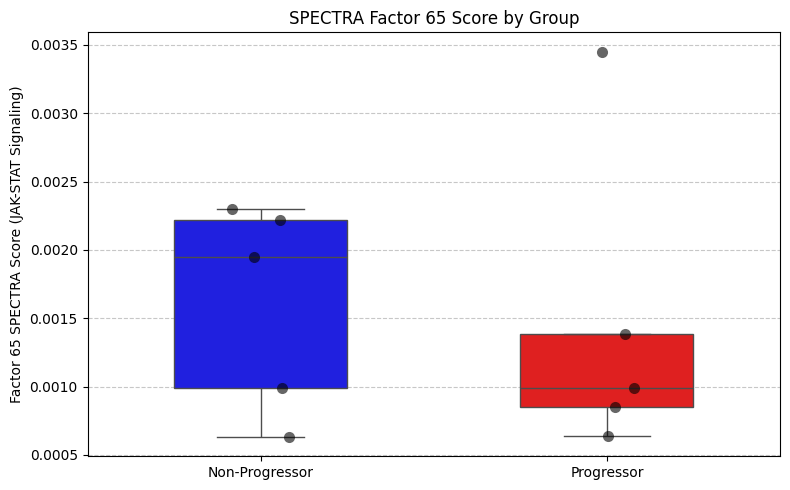

In [85]:

# Aggregate scores per sample for Factor 65 (mean score per sample)
df_factor65 = df_spectra.groupby(['sample', 'group'], observed=True)[65].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.boxplot(x='group', y=65, data=df_factor65, width=0.5, fliersize=0, palette={"Non-Progressor": "blue", "Progressor": "red"})
sns.stripplot(x='group', y=65, data=df_factor65, color='black', alpha=0.6, size=8, jitter=True)

# Customize plot
plt.xlabel("")
plt.ylabel("Factor 65 SPECTRA Score (JAK-STAT Signaling)")
plt.title("SPECTRA Factor 65 Score by Group")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [104]:
import pandas as pd
import scipy.stats as stats
from statsmodels.stats.multitest import multipletests

# Extract relevant data
spectra_scores = CD8TCells.obsm['SPECTRA_cell_scores']  # Cell-factor score matrix
samples = CD8TCells.obs['sample']  # Sample metadata
groups = CD8TCells.obs['group']  # Group labels

# Convert to DataFrame
df_spectra = pd.DataFrame(spectra_scores, index=CD8TCells.obs_names)
df_spectra['sample'] = samples.values
df_spectra['group'] = groups.values

# Aggregate cell scores per sample (mean across all cells per sample)
df_aggregated = df_spectra.groupby(['sample', 'group'], observed=True).mean().reset_index()


# Prepare list to store results
results = []

# Iterate through each factor (excluding 'sample' and 'group' columns)
for factor in df_aggregated.columns[2:]:  
    # Extract sample-level aggregated scores for each group
    group1 = df_aggregated[df_aggregated['group'] == 'Non-Progressor'][factor]
    group2 = df_aggregated[df_aggregated['group'] == 'Progressor'][factor]
    
    # Perform Mann-Whitney U-test
    stat, p_value = stats.mannwhitneyu(group1, group2, alternative='two-sided')
    
    # Compute fold change (Progressor / Non-Progressor mean)
    mean_group1 = group1.mean()
    mean_group2 = group2.mean()
    fc = mean_group2 / mean_group1 if mean_group1 != 0 else None  # Avoid division by zero
    
    # Append results
    results.append({
        'Factor': factor,
        'p_value': p_value,
        'fold_change': fc
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Adjust p-values using Benjamini-Hochberg (FDR correction)
results_df['FDR'] = multipletests(results_df['p_value'], method='fdr_bh')[1]

# Filter significant factors (FDR < 0.05)
#significant_factors = results_df[results_df['p_value'] < 0.1]

# Save results to CSV
results_df.to_csv('/Users/jyotirmoyroy/Desktop/Immunometabolism T1D Paper/Data/Sequencing/SingleCellRNASeq/Spectra/T1D_Timepoints/TCells/CD8/CD8TCells_T1D_Timepoints_Factors_pvalue_FC.csv', index=False)

print("Significant factors saved to 'Significant_factors_CD8TCell_pvalue_filter.csv'")


Significant factors saved to 'Significant_factors_CD8TCell_pvalue_filter.csv'


In [91]:
results_df

,Factor,p_value,fold_change,FDR
0,0,7.100884e-01,0.984467,7.889871e-01
1,1,6.359583e-01,1.004011,7.253337e-01
2,2,9.806200e-03,0.953425,2.512157e-02
3,3,8.620553e-01,0.980283,8.978922e-01
4,4,3.507494e-01,0.951702,4.589245e-01
...,...,...,...,...
135,135,8.108970e-08,0.901928,1.135256e-06
136,136,6.350060e-02,1.165508,1.169748e-01
137,137,8.726294e-03,0.966146,2.349387e-02
138,138,4.848782e-01,0.974942,5.902865e-01


In [95]:
# Find the max and min values for fold_change
max_fc = results_df['fold_change'].max()
min_fc = results_df['fold_change'].min()

# Print the results
print("Maximum fold change:", max_fc)
print("Minimum fold change:", min_fc)



Maximum fold change: 5.419160780026857
Minimum fold change: 0.15822066566211926


In [98]:
# Extract row names corresponding to factor names
row_names = factor_correlation.index.to_frame(index=False)

# Save as CSV
row_names.to_csv("factor_correlation_rownames.csv", index=False, header=False)

print("Factor_correlation_names_CD8T.csv")

Factor_correlation_names_CD8T.csv


In [101]:
df_spectra.to_csv("CD8T_CellScores.csv", index=False)

In [102]:
#Save the Mac file
import scanpy as sc
import os

# Define output file path
output_file = "/Users/jyotirmoyroy/Desktop/Immunometabolism T1D Paper/Data/Sequencing/SingleCellRNASeq/Spectra/T1D_Timepoints/TCells/CD8/CD8TCells_T1DTimepoints_Spectra.h5ad"

# Save the AnnData object
CD8TCells.write(output_file)

print(f"CD8TCells object saved as: {output_file}")


The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
CD8TCells object saved as: /Users/jyotirmoyroy/Desktop/Immunometabolism T1D Paper/Data/Sequencing/SingleCellRNASeq/Spectra/T1D_Timepoints/TCells/CD8/CD8TCells_T1DTimepoints_Spectra.h5ad


In [14]:
# Load the .h5ad file
CD8TCells = sc.read("/Users/jyotirmoyroy/Desktop/Immunometabolism T1D Paper/Data/Sequencing/SingleCellRNASeq/Spectra/T1D_Timepoints/TCells/CD8/CD8TCells_T1DTimepoints_Spectra.h5ad")

In [15]:
CD8TCells

AnnData object with n_obs × n_vars = 11492 × 6225
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'percent.rb', 'RNA_snn_res.0.1', 'seurat_clusters', 'pANN_0.25_0.17_480', 'doublet_finder', 'sample', 'time', 'group', 'pANN_0.25_0.28_1286', 'pANN_0.25_0.27_74', 'pANN_0.25_0.21_789', 'pANN_0.25_0.3_2525', 'pANN_0.25_0.3_3206', 'pANN_0.25_0.3_1840', 'pANN_0.25_0.25_460', 'pANN_0.25_0.3_908', 'pANN_0.25_0.3_2082', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.3', 'SCT_snn_res.0.5', 'SCT_snn_res.0.4', 'CellSubType', 'celltype'
    var: 'features', 'SCT_features', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'spectra_vocab'
    uns: 'SPECTRA_L', 'SPECTRA_factors', 'SPECTRA_markers', 'SPECTRA_overlap', 'hvg'
    obsm: 'SPECTRA_cell_scores', 'X_umap'
    layers: 'SCT'

In [26]:
import pandas as pd
import scipy.stats as stats
from statsmodels.stats.multitest import multipletests
import numpy as np  # Import numpy for log2 transformation

# Extract relevant data
spectra_scores = CD8TCells.obsm['SPECTRA_cell_scores']  # Cell-factor score matrix
time = CD8TCells.obs['time']  # Time metadata (Week6 or Week12)
groups = CD8TCells.obs['group']  # Group labels (Progressor, Non-Progressor)
factor_names = CD8TCells.uns['SPECTRA_overlap'].index.tolist()  # Get full factor names

# Convert to DataFrame and assign proper factor names
df_spectra = pd.DataFrame(spectra_scores, index=CD8TCells.obs_names, columns=factor_names)
df_spectra['time'] = time.values
df_spectra['group'] = groups.values

# Prepare list to store results
results = []

# Split analysis by time point
for timepoint in ['Week6', 'Week12']:
    df_time = df_spectra[df_spectra['time'] == timepoint]
    
    for factor in factor_names:  # Iterate over full factor names
        # Extract cell-level scores for each group
        group1 = df_time[df_time['group'] == 'Non-Progressor'][factor]
        group2 = df_time[df_time['group'] == 'Progressor'][factor]
        
        if len(group1) > 0 and len(group2) > 0:  # Ensure both groups have values
            # Perform Mann-Whitney U-test
            stat, p_value = stats.mannwhitneyu(group1, group2, alternative='two-sided')
            
            # Compute log2 fold change (log2FC = log2(Progressor mean / Non-Progressor mean))
            mean_group1 = group1.mean()
            mean_group2 = group2.mean()
            log2_fc = np.log2(mean_group2 / mean_group1) if mean_group1 > 0 else None  # Avoid log(0)

            # Append results
            results.append({
                'Timepoint': timepoint,
                'Factor': factor,  # Use full factor name
                'p_value': p_value,
                'log2FC': log2_fc
            })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Adjust p-values using Benjamini-Hochberg (FDR correction)
results_df['FDR'] = multipletests(results_df['p_value'], method='fdr_bh')[1]

# Save results to CSV
output_path = "/Users/jyotirmoyroy/Desktop/Immunometabolism T1D Paper/Data/Sequencing/SingleCellRNASeq/Spectra/T1D_Timepoints/TCells/CD8/CD8TCells_T1D_Timepoints_Cellwise_Factors_pvalue_log2FC.csv"
results_df.to_csv(output_path, index=False)

print(f"Results saved to {output_path}")


Results saved to /Users/jyotirmoyroy/Desktop/Immunometabolism T1D Paper/Data/Sequencing/SingleCellRNASeq/Spectra/T1D_Timepoints/TCells/CD8/CD8TCells_T1D_Timepoints_Cellwise_Factors_pvalue_log2FC.csv


In [24]:
results_df

,Timepoint,Factor,p_value,log2FC,FDR
0,Week6,0-X-global-X-all_chondroitine-and-heparan-sulf...,2.327342e-02,0.103483,4.722143e-02
1,Week6,1-X-global-X-all_RIG-I-like-receptor_signaling,9.007659e-01,0.021007,9.309844e-01
2,Week6,2-X-global-X-all_p53-signaling,4.854429e-01,-0.018069,5.735191e-01
3,Week6,3-X-global-X-all_autophagy-chaperone-mediated,2.791643e-01,-0.087078,3.641264e-01
4,Week6,4-X-global-X-all_circadian-rhythm,1.116797e-01,-0.049256,1.746946e-01
...,...,...,...,...,...
275,Week12,135-X-global-X-135,1.054054e-01,-0.114986,1.667430e-01
276,Week12,136-X-global-X-T_IL4_response,2.295390e-01,0.367636,3.135167e-01
277,Week12,137-X-global-X-all_type-II-ifn-response,2.181011e-04,-0.133848,7.539296e-04
278,Week12,138-X-global-X-T_IL21_response,5.627078e-01,-0.061858,6.510669e-01


In [21]:
factor_names = CD8TCells.uns['SPECTRA_overlap'].index.tolist()

In [22]:
factor_names

['0-X-global-X-all_chondroitine-and-heparan-sulfate_synthesis',
 '1-X-global-X-all_RIG-I-like-receptor_signaling',
 '2-X-global-X-all_p53-signaling',
 '3-X-global-X-all_autophagy-chaperone-mediated',
 '4-X-global-X-all_circadian-rhythm',
 '5-X-global-X-all_VAL-LEU-ILE_metabolism',
 '6-X-global-X-all_taurine-hypotaurine_metabolism',
 '7-X-global-X-all_microautophagy-lysosomal',
 '8-X-global-X-all_macroautophagy_regulation_positive',
 '9-X-global-X-all_type-II-ifn-response',
 '10-X-global-X-10',
 '11-X-global-X-all_histone-methylation',
 '12-X-global-X-all_TNF-via-NFkB_signaling',
 '13-X-global-X-all_iron-uptake-and-storage',
 '14-X-global-X-all_n-glycan_synthesis',
 '15-X-global-X-all_transmembrane-transport-golgi',
 '16-X-global-X-all_PHE_metabolism',
 '17-X-global-X-all_riboflavin_metabolism',
 '18-X-global-X-all_polyamines_metabolism',
 '19-X-global-X-all_PI3K-AKT-mTOR_signaling',
 '20-X-global-X-all_inositol-phosphate_metabolism',
 '21-X-global-X-all_DNA-demethylation',
 '22-X-globa

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Week12_Non-Progressor vs. Week12_Progressor: 
Week6_Non-Progressor vs. Week6_Progressor: ***
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Week12_Non-Progressor vs. Week12_Progressor: ******
Week6_Non-Progressor vs. Week6_Progressor: ******


<Figure size 1200x600 with 0 Axes>

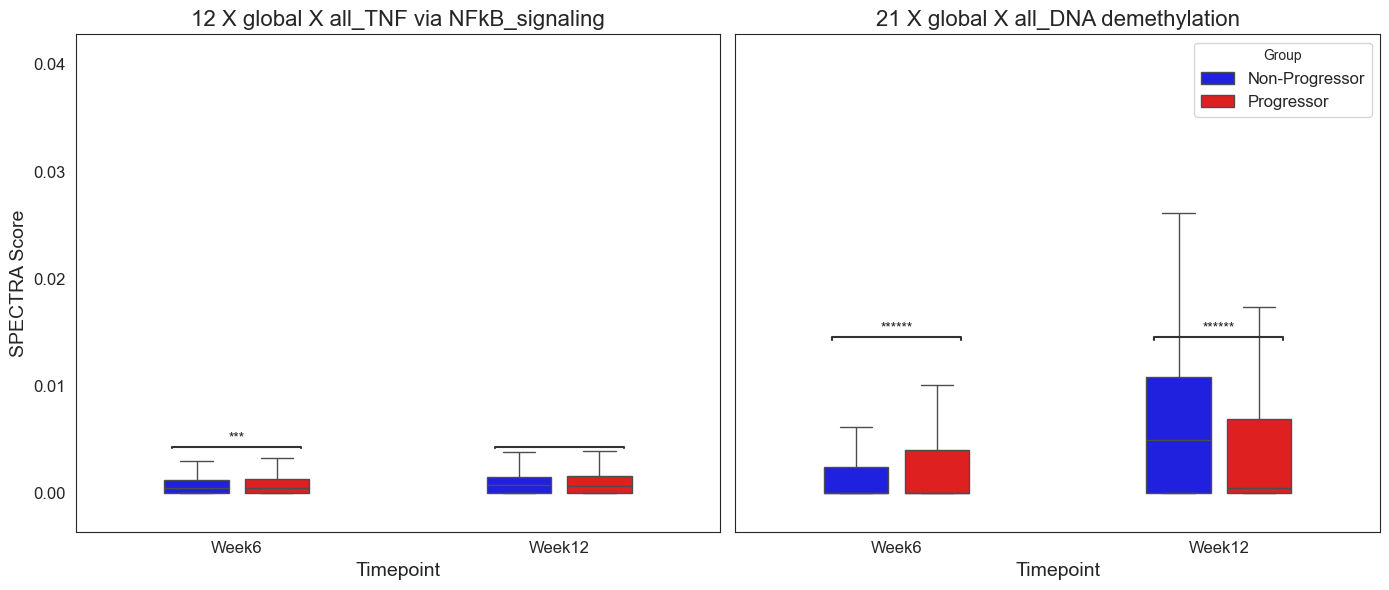

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import numpy as np
from statsmodels.stats.multitest import multipletests
from statannotations.Annotator import Annotator

# Define factors to plot
factors_to_plot = [
    "12-X-global-X-all_TNF-via-NFkB_signaling",
    "21-X-global-X-all_DNA-demethylation"
]

# Extract relevant data
spectra_scores = CD8TCells.obsm['SPECTRA_cell_scores']  
time = CD8TCells.obs['time']  
groups = CD8TCells.obs['group']  
factor_names = CD8TCells.uns['SPECTRA_overlap'].index.tolist()  

df_spectra = pd.DataFrame(spectra_scores, index=CD8TCells.obs_names, columns=factor_names)
df_spectra['Timepoint'] = time.values
df_spectra['Group'] = groups.values

df_filtered = df_spectra.melt(id_vars=['Timepoint', 'Group'], value_vars=factors_to_plot, 
                              var_name='Factor', value_name='Score')

# Compute statistics
stats_results = []
for factor in factors_to_plot:
    for timepoint in ['Week6', 'Week12']:
        df_time = df_filtered[(df_filtered['Timepoint'] == timepoint) & (df_filtered['Factor'] == factor)]
        group1 = df_time[df_time['Group'] == 'Non-Progressor']['Score']
        group2 = df_time[df_time['Group'] == 'Progressor']['Score']
        if len(group1) > 0 and len(group2) > 0:  
            stat, p_value = stats.mannwhitneyu(group1, group2, alternative='two-sided')
            stats_results.append({'Factor': factor, 'Timepoint': timepoint, 'p_value': p_value})

stats_df = pd.DataFrame(stats_results)
stats_df['FDR'] = multipletests(stats_df['p_value'], method='fdr_bh')[1]

df_filtered = df_filtered.merge(stats_df, on=['Factor', 'Timepoint'], how='left')

# Set up plot
plt.figure(figsize=(12, 6))
sns.set_style("white")

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

for i, factor in enumerate(factors_to_plot):
    ax = axes[i]
    df_plot = df_filtered[df_filtered['Factor'] == factor]

    # Boxplot with Progressor and Non-Progressor side by side
    sns.boxplot(
        data=df_plot,
        x="Timepoint",
        y="Score",
        hue="Group",
        dodge=True,  # Ensures side-by-side separation
        width=0.5,   # Adjust width to control box size
        gap=0.2,     # Increase gap between groups
        palette={"Non-Progressor": "blue", "Progressor": "red"},
        showfliers=False,
        ax=ax
    )

    ax.grid(False)
    ax.set_title(factor.replace("-", " "), fontsize=16)
    ax.set_xlabel("Timepoint", fontsize=14)
    ax.set_ylabel("SPECTRA Score", fontsize=14)
    ax.tick_params(axis='both', labelsize=12)

    # Remove duplicate legends
    if i == 1:
        ax.legend(title="Group", fontsize=12)
    else:
        ax.get_legend().remove()

    # Add significance annotations
    pairs = [(("Week6", "Non-Progressor"), ("Week6", "Progressor")), 
             (("Week12", "Non-Progressor"), ("Week12", "Progressor"))]
    
    p_values = df_plot[['Timepoint', 'p_value']].drop_duplicates().set_index('Timepoint')['p_value'].to_dict()
    
    annotator = Annotator(ax, pairs, data=df_plot, x="Timepoint", y="Score", hue="Group")
    annotator.configure(test=None, text_format="star", loc="outside")
    
    formatted_pvals = [p_values.get(t, 1.0) for t in ['Week6', 'Week12']]
    formatted_pvals = ["*" * (p < 0.05) + "**" * (p < 0.01) + "***" * (p < 0.001) for p in formatted_pvals]
    annotator.set_custom_annotations(formatted_pvals)
    annotator.annotate()

    # Adjust y-axis limits to accommodate p-value annotations
    y_min, y_max = df_plot['Score'].min(), df_plot['Score'].max()
    ax.set_ylim(y_min - 0.1 * (y_max - y_min), y_max + 0.2 * (y_max - y_min))

plt.tight_layout()
plt.show()